<p><h2>
    In this turorial I am going to classify different types of champignon.
</h2></p><br>
<b>Dataset pipeline is as follows:</b><br><br>
<li>1: finding the champignon types and downloading 100 images of each type is its own folder</li>
<li>2: creating data.json file where each id and label is stored</li>
<li>3: deleting all png files and resizing all pictures to (200 x 200)</li>
<li>4: create a test, train and validation datasets variables</li><br>
<b style ='color:red'>step 3 and 4 will be repeated to ceate (300 X 500) and (600 x 800). This way we have more data in our data set and the prediction in my understanding becomes more accurate</b></p><br>


<b><h2>Step 1:</h2></b><br>
<p>Install <b style = 'color:red'>Downlod All Images</b> Chrome extention tool to download images from Google</p>

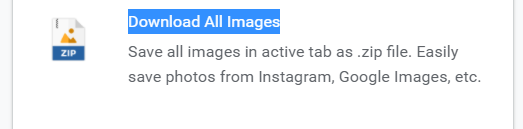

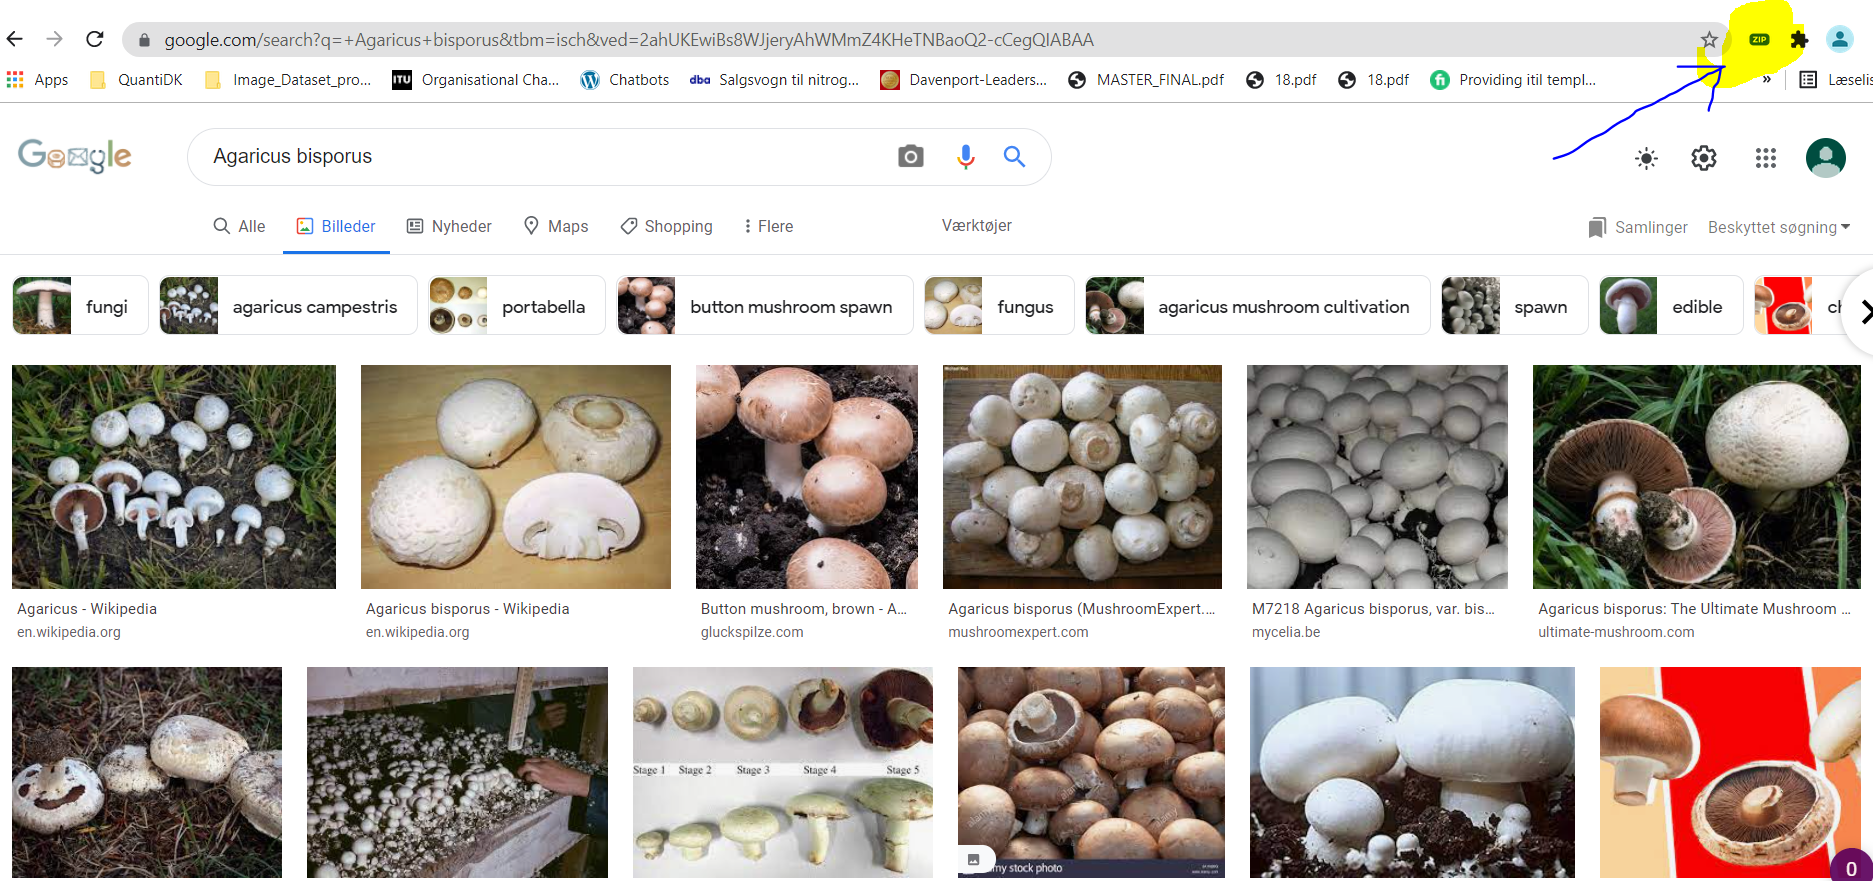

<b><h2>Step 2:</h2></b><br>
<p>Creating a data.json file</p><br>

In [2]:
import json

fungi_classes = {}

fungi_classes['champignon'] = {
'01':'Agaricus_arvensis',
'02':'Agaricus_augustus',
'03':'Agaricus_campestris',
'04':'Agaricus_xanthodermus',
'05':'Coprinus_comatus',
'06':'Lycoperdon_echinatum',
'07':'Lycoperdon_perlatum',
'08':'Lycoperdon_pyriforme',
'09':'Macrolepiota_procera',
'10':'Leucoagaricus_nympharum',
'11':'Chlorophyllum_rhacodes',
'12':'Crucibulum_crucibuliforme',
'13':'Chlorophyllum_brunneum'
}
with open('data.json', 'w') as outfile:
    json.dump(fungi_classes, outfile)

In [33]:
# loading and printing out the data.json file
with open('data.json', 'r') as f:
    data_json = f.read()
print(data_json)

{"champignon": {"01": "Agaricus_arvensis", "02": "Agaricus_augustus", "03": "Agaricus_campestris", "04": "Agaricus_xanthodermus", "05": "Coprinus_comatus", "06": "Lycoperdon_echinatum", "07": "Lycoperdon_perlatum", "08": "Lycoperdon_pyriforme", "09": "Macrolepiota_procera", "10": "Leucoagaricus_nympharum", "11": "Chlorophyllum_rhacodes", "12": "Crucibulum_crucibuliforme", "13": "Chlorophyllum_brunneum"}}


<b><h2>Step 3:</h2></b><br>

In [35]:
#!/usr/bin/python
import glob
from PIL import Image
import os, sys

path = glob.glob("newdata/Champignon/*/*.jpg")

    
def resize():
    for item in path:
        im = Image.open(item)
        f, e = os.path.splitext(item) 
        imResize = im.resize((600,800), Image.ANTIALIAS)
        imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

<p> You can repreat the process with cusotmized (300 x 500) and (200 x 200). This way you will have more data and more prediction accuracy, I will always more varied pictures but since I have a limited pictures from google about champignon types, I can extend my data this way</p>

<b><h2>Step 4:</h2></b><br>

In [43]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("newdata/Champignon/", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
splitfolders.fixed("newdata/Champignon/", output="output", seed=1337, fixed=(400, 400), oversample=False, group_prefix=None) # default values



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  7.53 files/s]
Copying files: 92 files [00:00, 473.72 files/s]
Copying files: 172 files [00:00, 611.54 files/s]
Copying files: 248 files [00:00, 652.58 files/s]
Copying files: 329 files [00:00, 701.19 files/s]
Copying files: 401 files [00:00, 609.21 files/s]
Copying files: 495 files [00:00, 702.53 files/s]
Copying files: 587 files [00:00, 765.57 files/s]
Copying files: 667 files [00:00, 763.62 files/s]
Copying files: 754 files [00:01, 793.78 files/s]
Copying files: 847 files [00:01, 832.82 files/s]
Copying files: 938 files [00:01, 852.46 files/s]
Copying files: 1025 files [00:01, 784.67 files/s]
Copying files: 1110 files [00:01, 802.89 files/s]
Copying files: 1197 files [00:01, 819.55 files/s]
Copying files: 1285 files [00:01, 836.73 files/s]
Copying files: 1372 files [00:01, 844.27 files/s]
Copying files: 1457 files [00:01, 748.79 files/s]
Copying files: 1535 files [00:02, 720.70 files/s]
Copying files: 1622 fil

ValueError: The number of samples in class "10056_Agaricus_arvensis" are too few. There are only 610 samples available but your fixed parameter (400, 400) requires at least 800 files. You may want to split your classes by ratio.

In [36]:
data_dir = 'output'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
test_dir = data_dir + '/test'

<h2>Now our dataset is ready for image classification</h2>

In [37]:
#https://medium.com/@josh_2774/deep-learning-with-pytorch-9574e74d17ad

# Imports here
import time
import json
import copy

import torch 
import torchvision
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
data_dir = 'output'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
test_dir = data_dir + '/test'

In [45]:
# Define your transforms for the training, validation, and testing sets
batch_size = 32
data_transforms = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                    [0.229, 0.224, 0.225])
        ]),
        'valid': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                    [0.229, 0.224, 0.225])
        ]),
        'test': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                    [0.229, 0.224, 0.225])
        ])
} 

# TODO: Load the datasets with ImageFolder
image_datasets = {
    'train': datasets.ImageFolder(train_dir, 
                                  transform=data_transforms['train']),
    'valid': datasets.ImageFolder(valid_dir,
                                  transform=data_transforms['valid']),
    'test': datasets.ImageFolder(test_dir,
                                  transform=data_transforms['test'])
}

# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'],
                                        batch_size=batch_size,
                                        shuffle=True),
    'valid': torch.utils.data.DataLoader(image_datasets['valid'],
                                        batch_size=batch_size,
                                        shuffle=True),
    'test': torch.utils.data.DataLoader(image_datasets['test'],
                                        batch_size=batch_size,
                                        shuffle=True) 
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
print(dataset_sizes)

class_names = image_datasets['train'].classes

{'train': 4296, 'valid': 533, 'test': 541}


In [46]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


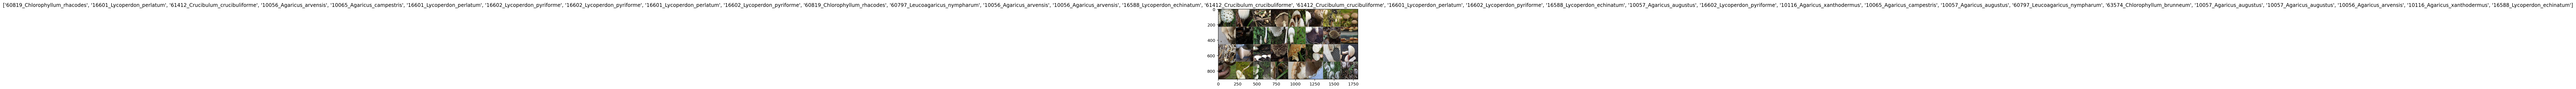

In [47]:
#classes_id = image_datasets['train'].classes

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [48]:
# Build and train your networkg
'''
Load a pre-trained network. Alexnet as a starting point.
Then we freesze the parameters and define the in and out features.

'''
model = models.vgg16(pretrained=True) 
print('VGGNet', model.parameters) # other models use .classifier as vgg16 ex

VGGNet <bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kern

In [49]:
'''
Here, we need to freeze all the network except the final layer. We need to set requires_grad == False to freeze the parameters so 
that the gradients are not computed in backward().
'''
for param in model.parameters():
    param.requires_grad = False

In [50]:
# Defining the in_features, out_features and modifying out_features from the total classes. 
in_ft = model.classifier[0].in_features
out_ft = model.classifier[0].out_features
out_ft_mod = 13 #modified after number of classes

print(' Classifer in_features: {}\n Classifer in_features: {}\n Modified out_features:{}'.format(in_ft, out_ft, out_ft_mod))

 Classifer in_features: 25088
 Classifer in_features: 4096
 Modified out_features:13


In [51]:
# Define a new, untrained feed-forward
# network as a classifier, using ReLU activations and dropout

'''
We define the hyperparameter
hidden units and learning. Finally using the Relu activations and drop and dropout

Parameters of newly constructed modules have requires_grad=True by default
'''

hidden_units = 500 
learning_rate = 0.001 
classifier = torch.nn.Sequential(OrderedDict([
                    ('fc1', nn.Linear(in_ft, out_ft)),
                    ('relu', nn.ReLU()),
                    ('dropout', nn.Dropout(p=0.5)),
                    ('fc2', nn.Linear(out_ft, hidden_units)),
                    ('relu', torch.nn.ReLU()),
                    ('dropout', torch.nn.Dropout(p=0.5)),
                    ('fc3', nn.Linear(hidden_units, out_ft_mod)),
                    ('output', nn.LogSoftmax(dim=1))
                    ]))

model.classifier = classifier
# Observe that all parameters are being optimized
optimizer = torch.optim.SGD(model.classifier.parameters(), lr=learning_rate, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Decay LR by a factor of 0.1 every 7 epochs
print('classifier : {}'.format(classifier))

classifier : Sequential(
  (fc1): Linear(in_features=25088, out_features=4096, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=4096, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=13, bias=True)
  (output): LogSoftmax(dim=1)
)


In [52]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=2):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('-' * 10)
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('Phase: {} Loss: {:.4f} Acc: {:.4f}'.format(
                   phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model

In [53]:
epochs = 20
model.to(device)
model = train_model(model, criterion, optimizer, scheduler, num_epochs=epochs)

----------
Epoch 0/19
----------


C:\Users\ghadb\anaconda3\envs\fungiapp\lib\site-packages\torch\optim\lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
C:\Users\ghadb\anaconda3\envs\fungiapp\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Phase: train Loss: 1.8835 Acc: 0.4115
Phase: valid Loss: 1.1106 Acc: 0.6266

----------
Epoch 1/19
----------
Phase: train Loss: 1.1565 Acc: 0.6266
Phase: valid Loss: 0.7999 Acc: 0.7223

----------
Epoch 2/19
----------
Phase: train Loss: 0.9770 Acc: 0.6634
Phase: valid Loss: 0.6196 Acc: 0.7880

----------
Epoch 3/19
----------
Phase: train Loss: 0.8363 Acc: 0.7211
Phase: valid Loss: 0.5173 Acc: 0.8311

----------
Epoch 4/19
----------
Phase: train Loss: 0.7351 Acc: 0.7572
Phase: valid Loss: 0.4046 Acc: 0.8799

----------
Epoch 5/19
----------
Phase: train Loss: 0.6836 Acc: 0.7668
Phase: valid Loss: 0.4433 Acc: 0.8518

----------
Epoch 6/19
----------
Phase: train Loss: 0.6330 Acc: 0.7905
Phase: valid Loss: 0.3396 Acc: 0.9043

----------
Epoch 7/19
----------
Phase: train Loss: 0.5988 Acc: 0.8091
Phase: valid Loss: 0.3312 Acc: 0.9062

----------
Epoch 8/19
----------
Phase: train Loss: 0.5927 Acc: 0.8128
Phase: valid Loss: 0.3269 Acc: 0.9118

----------
Epoch 9/19
----------
Phase: tra

Copying files: 2525 files [19:07,  2.20 files/s] 


Phase: train Loss: 0.5811 Acc: 0.8168
Phase: valid Loss: 0.3078 Acc: 0.9212

----------
Epoch 11/19
----------
Phase: train Loss: 0.5667 Acc: 0.8198
Phase: valid Loss: 0.2955 Acc: 0.9212

----------
Epoch 12/19
----------
Phase: train Loss: 0.5577 Acc: 0.8210
Phase: valid Loss: 0.2842 Acc: 0.9287

----------
Epoch 13/19
----------
Phase: train Loss: 0.5450 Acc: 0.8208
Phase: valid Loss: 0.2832 Acc: 0.9287

----------
Epoch 14/19
----------
Phase: train Loss: 0.5765 Acc: 0.8128
Phase: valid Loss: 0.2833 Acc: 0.9287

----------
Epoch 15/19
----------
Phase: train Loss: 0.5682 Acc: 0.8173
Phase: valid Loss: 0.2828 Acc: 0.9306

----------
Epoch 16/19
----------
Phase: train Loss: 0.5741 Acc: 0.8177
Phase: valid Loss: 0.2833 Acc: 0.9268

----------
Epoch 17/19
----------
Phase: train Loss: 0.5469 Acc: 0.8301
Phase: valid Loss: 0.2822 Acc: 0.9287

----------
Epoch 18/19
----------
Phase: train Loss: 0.5504 Acc: 0.8212
Phase: valid Loss: 0.2805 Acc: 0.9306

----------
Epoch 19/19
----------
P

<p>We have an 93 % accuracy </p>

In [54]:
# Do validation on the test set

running_loss = 0.0
running_corrects = 0

for inputs, labels in dataloaders["test"]:
    inputs = inputs.to(device)
    labels = labels.to(device)

    model.eval()
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)

test_loss = running_loss / dataset_sizes['test']
test_acc = running_corrects.double() / dataset_sizes['test']
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

Test Loss: 0.20016551970774496
Test Accuracy: 0.9630314232902033


In [55]:
# Save the checkpoint
model.class_to_idx = image_datasets['train'].class_to_idx
checkpoint = {'arch': 'vgg16',
              'optimizer':optimizer,
              'state_dict':model.state_dict(),
              'class_to_idx':model.class_to_idx,
              'hidden_units':hidden_units,
              'learning_rate':learning_rate,
              'epochs': epochs,
              'classifier':model.classifier}
print('Saving checkpoint.')
torch.save(checkpoint, 'VGGNet.pth')

Saving checkpoint.


In [56]:
#Write a function that loads a checkpoint and rebuilds the model

def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = getattr(models, checkpoint['arch'])(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.classifier = checkpoint['classifier'] #putting model in pretrained network
    model.state_dict = checkpoint['state_dict']
    model.class_to_idx = checkpoint['class_to_idx']
    return model

In [57]:
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # Process a PIL image for use in a PyTorch model
    
    img = Image.open(image)
    img_tensor = preprocess(img)
    return img_tensor

In [58]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    if title:
        plt.title(title)
    ax.imshow(image, aspect="auto")
    
    return ax

In [59]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    #Implement the code to predict the class from an image file
    processed_image = process_image(image_path)
    processed_image.unsqueeze_(0)
    output = model(processed_image.cuda())
    probs, indices = torch.topk(F.softmax(output, dim=1), topk, sorted=True)
    idx_to_class = { v:k for k, v in model.class_to_idx.items()}
    return [prob.item() for prob in probs[0].data], [idx_to_class[ix.item()] for ix in indices[0].data]

In [199]:
# Label mapping
with open('data.json', 'r') as f:
    cat_to_name = json.load(f)

classes = cat_to_name
classes

{'champignon': {'01': 'Agaricus_arvensis',
  '02': 'Agaricus_augustus',
  '03': 'Agaricus_campestris',
  '04': 'Agaricus_xanthodermus',
  '05': 'Coprinus_comatus',
  '06': 'Lycoperdon_echinatum',
  '07': 'Lycoperdon_perlatum',
  '08': 'Lycoperdon_pyriforme',
  '09': 'Macrolepiota_procera',
  '10': 'Leucoagaricus_nympharum',
  '11': 'Chlorophyllum_rhacodes',
  '12': 'Crucibulum_crucibuliforme',
  '13': 'Chlorophyllum_brunneum'}}

[0.7538102269172668, 0.15390078723430634, 0.040756482630968094, 0.023482318967580795, 0.01516447402536869]
['60797_Leucoagaricus_nympharum', '60819_Chlorophyllum_rhacodes', '16660_Macrolepiota_procera', '10116_Agaricus_xanthodermus', '10057_Agaricus_augustus']


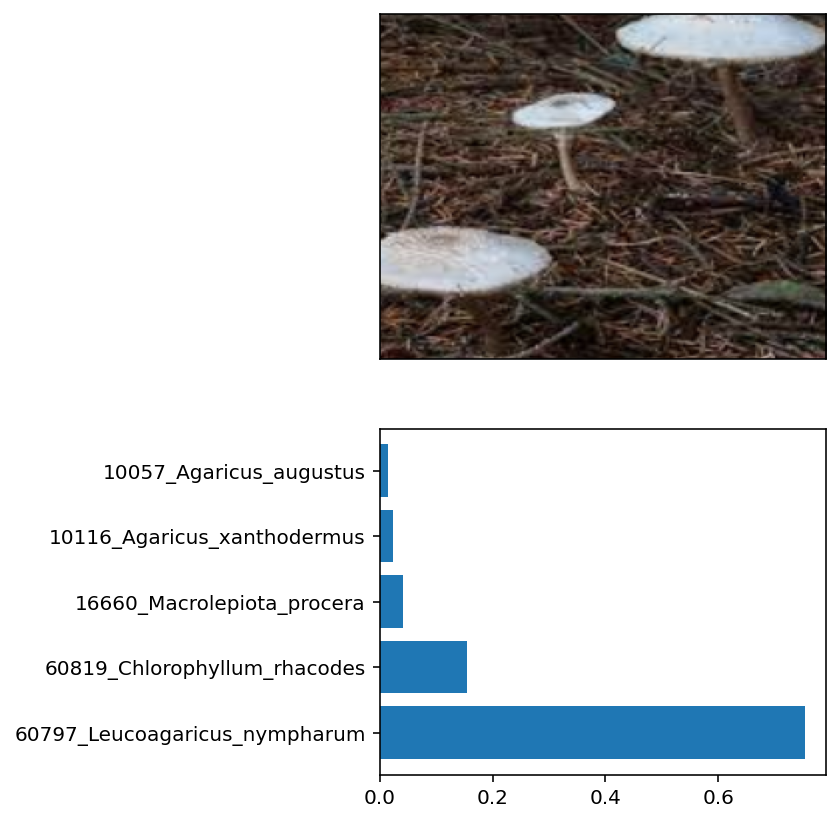

In [200]:
#Display an image along with the top 5 classes

saved_model = load_checkpoint("VGGNet.pth")
saved_model = saved_model.to(device)
probs, classes = predict("1.jfif", saved_model)
#class_names = classes


fig = plt.figure(figsize=(4, 7))

ax1 = fig.add_subplot(2, 1, 1)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
imshow(process_image("1.jfif"), ax=ax1) #title=cat_to_name["1"]);

ax2 = fig.add_subplot(2, 1 , 2)
ax2.barh(classes, probs);

print(probs)
print(classes)

# to load more models at the same time look at this link:
https://discuss.pytorch.org/t/combining-trained-models-in-pytorch/28383/2